<a href="https://colab.research.google.com/github/DanielleRomanoff/DS-Unit-4-Sprint-3-Neural-Networks/blob/master/Keras_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Use the Keras Library to build a Multi-Layer Perceptron Model on the Boston Housing dataset

- The Boston Housing dataset comes with the Keras library so use Keras to import it into your notebook. 
- Normalize the data (all features should have roughly the same scale)
- Import the type of model and layers that you will need from Keras.
- Instantiate a model object and use `model.add()` to add layers to your model
- Since this is a regression model you will have a single output node in the final layer.
- Use activation functions that are appropriate for this task
- Compile your model
- Fit your model and report its accuracy in terms of Mean Squared Error
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Run this same data through a linear regression model. Which achieves higher accuracy?
- Do a little bit of feature engineering and see how that affects your neural network model. (you will need to change your model to accept more inputs)
- After feature engineering, which model sees a greater accuracy boost due to the new features?

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from keras import models
from keras import layers
from keras.models import Sequential
from keras.layers import Dense
from numpy import array
from numpy import argmax
from keras.utils import to_categorical

Using TensorFlow backend.


In [0]:
# Load dataset
from keras.datasets import boston_housing
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

In [0]:
# take a look at the data

print(f'Training data : {x_train.shape}')
print(f'Training targets: {y_train.shape}')
print(f'Testing data : {x_test.shape}')
print(f'Testing targets: {y_test.shape}')

Training data : (404, 13)
Training targets: (404,)
Testing data : (102, 13)
Testing targets: (102,)


In [0]:
y_train = np.reshape(y_train, (-1,1))
y_test = np.reshape(y_test, (-1,1))

In [0]:
from sklearn import preprocessing
# normalize the data attributes
normalized_X_train = preprocessing.normalize(x_train)
normalized_X_test = preprocessing.normalize(x_test)
# normalized_Y_train = preprocessing.normalize(y_train)
# normalize_Y_test = preprocessing.normalize(y_test)

In [0]:
# split into input (X) and output (Y) variables

X = normalized_X_train
Y = y_train

# print(X)
# print(Y)

In [0]:
# fix random seed for reproducibility
np.random.seed(42)

In [0]:
# https://keras.io/getting-started/sequential-model-guide/
# instantiate the model as Sequential
model = Sequential()

In [0]:
# Adding a "Dense" layer to our model is how we add "vanilla" perceptron-based layers to our neural network
model.add(Dense(13, input_dim=13, activation ='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='relu'))

In [0]:
# Compile Model
model.compile(optimizer='rmsprop',loss='mse', metrics=['mean_squared_error'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 13)                182       
_________________________________________________________________
dense_23 (Dense)             (None, 10)                140       
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 11        
Total params: 333
Trainable params: 333
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Fit the model
history = model.fit(X, Y, epochs=50)

Epoch 1/50
404/404 [==============================] - 0s 911us/step - loss: 586.1605 - mean_squared_error: 586.1605
Epoch 2/50
404/404 [==============================] - 0s 43us/step - loss: 586.1605 - mean_squared_error: 586.1605
Epoch 3/50
404/404 [==============================] - 0s 40us/step - loss: 586.1605 - mean_squared_error: 586.1605
Epoch 4/50
404/404 [==============================] - 0s 45us/step - loss: 586.1605 - mean_squared_error: 586.1605
Epoch 5/50
404/404 [==============================] - 0s 39us/step - loss: 586.1605 - mean_squared_error: 586.1605
Epoch 6/50
404/404 [==============================] - 0s 44us/step - loss: 586.1605 - mean_squared_error: 586.1605
Epoch 7/50
404/404 [==============================] - 0s 42us/step - loss: 586.1605 - mean_squared_error: 586.1605
Epoch 8/50
404/404 [==============================] - 0s 40us/step - loss: 586.1605 - mean_squared_error: 586.1605
Epoch 9/50
404/404 [==============================] - 0s 41us/step - loss: 586.

In [0]:
#Evaluate the model
scores = model.evaluate(normalized_X_test, y_test)
test_mse_score, test_mae_score = model.evaluate(normalized_X_test, y_test)
print(f"{model.metrics_names[1]}: {scores[1]*1000}")
test_mse_score

102/102 [==============================] - 0s 51us/step
mean_squared_error: 615857.8383501838


615.8578383501838

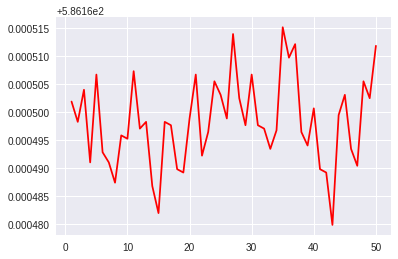

In [0]:
training_loss = history.history['loss']
epoch_count = range(1, len(training_loss) + 1)

plt.plot(epoch_count, training_loss, 'r')
plt.show();

In [0]:
history.history

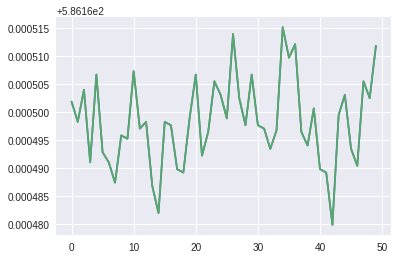

In [0]:
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['loss'])
plt.show()

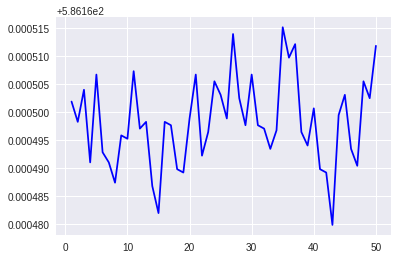

In [0]:
training_accuracy = history.history['mean_squared_error']
epoch_count = range(1, len(training_accuracy) + 1)

plt.plot(epoch_count, training_accuracy, 'b')
plt.show();

Next Problem
Use the Keras Library to build an image recognition network using the Fashion-MNIST dataset (also comes with keras)
Load and preprocess the image data similar to how we preprocessed the MNIST data in class.
Make sure to one-hot encode your category labels
Make sure to have your final layer have as many nodes as the number of classes that you want to predict.
Try different hyperparameters. What is the highest accuracy that you are able to achieve.
Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch.
Remember that neural networks fall prey to randomness so you may need to run your model multiple times (or use Cross Validation) in order to tell if a change to a hyperparameter is truly producing better results.

In [2]:
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
import numpy as np

In [0]:
# global hyperparameters

batch_size = 128
num_classes = 10
epochs = 20

In [5]:
# take a look at the data

print(f'Training data : {x_train.shape}')
print(f'Training targets: {y_train.shape}')
print(f'Testing data : {x_test.shape}')
print(f'Testing targets: {y_test.shape}')

Training data : (60000, 28, 28)
Training targets: (60000,)
Testing data : (10000, 28, 28)
Testing targets: (10000,)


In [0]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
y_train = np.reshape(y_train, (-1,1))
y_test = np.reshape(y_test, (-1,1))

In [7]:
# take a look at the data

print(f'Training data : {x_train.shape}')
print(f'Training targets: {y_train.shape}')
print(f'Testing data : {x_test.shape}')
print(f'Testing targets: {y_test.shape}')

Training data : (60000, 784)
Training targets: (60000, 1)
Testing data : (10000, 784)
Testing targets: (10000, 1)


In [8]:
x_train.dtype, x_test.dtype, y_train.dtype, y_test.dtype

(dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('uint8'))

In [9]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train.dtype, x_test.dtype, y_train.dtype, y_test.dtype

(dtype('float32'), dtype('float32'), dtype('uint8'), dtype('uint8'))

In [0]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [11]:
x_train /= 255
x_test /= 255

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [0]:
# batch_size = 64
# num_classes = 10
# epochs = 50

# # (x_train, y_train), (x_test, y_test) = mnist.load_data()

# # Flatten the images
# x_train = x_train.reshape(60000, 784)
# x_test = x_test.reshape(10000, 784)

# x_train = x_train.astype('float32')
# x_test = x_test.astype('float32')

# y_train = keras.utils.to_categorical(y_train, num_classes)
# y_test = keras.utils.to_categorical(y_test, num_classes)

# x_train /= 255
# x_test /= 255

# print(x_train.shape[0], 'train samples')
# print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [0]:
# Fit Model
model = Sequential()
model.add(Dense(25, activation = 'relu', input_shape=(784,)))
model.add(Dropout(0.1))
model.add(Dense(20, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(num_classes, activation='softmax'))


In [14]:
# Compile Model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 25)                19625     
_________________________________________________________________
dropout_4 (Dropout)          (None, 25)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 20)                520       
_________________________________________________________________
dropout_5 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 16)                336       
_________________________________________________________________
dropout_6 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                170       
Total para

In [15]:
history = model.fit(x_train, y_train, epochs=epochs, validation_split=.1)
scores = model.evaluate(x_test, y_test)

Instructions for updating:
Use tf.cast instead.
Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 4s 77us/step - loss: 0.8757 - acc: 0.6790 - val_loss: 0.4903 - val_acc: 0.8370
Epoch 2/20
54000/54000 [==============================] - 3s 62us/step - loss: 0.5747 - acc: 0.7952 - val_loss: 0.4604 - val_acc: 0.8322
Epoch 3/20
54000/54000 [==============================] - 3s 59us/step - loss: 0.5284 - acc: 0.8134 - val_loss: 0.4337 - val_acc: 0.8435
Epoch 4/20
54000/54000 [==============================] - 3s 59us/step - loss: 0.4962 - acc: 0.8234 - val_loss: 0.4202 - val_acc: 0.8512
Epoch 5/20
54000/54000 [==============================] - 3s 59us/step - loss: 0.4795 - acc: 0.8291 - val_loss: 0.4027 - val_acc: 0.8565
Epoch 6/20
54000/54000 [==============================] - 3s 58us/step - loss: 0.4650 - acc: 0.8341 - val_loss: 0.4099 - val_acc: 0.8583
Epoch 7/20
54000/54000 [==============================] - 3s 59us/step - loss: 0.

In [16]:
y_pred = model.predict_classes(x_test)
print(f'{model.metrics_names[1]}: {scores[1]*100}')

acc: 85.44


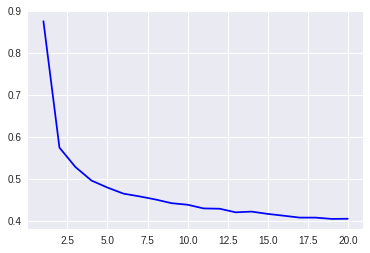

In [19]:
training_loss = history.history['loss']
epoch_count = range(1, len(training_loss) + 1)

plt.plot(epoch_count, training_loss, 'b')
plt.show();

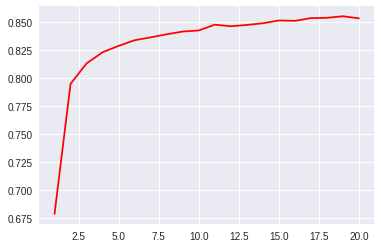

In [18]:
training_accuracy = history.history['acc']
epoch_count = range(1, len(training_accuracy) + 1)

plt.plot(epoch_count, training_accuracy, 'r')
plt.show();

## Use the Keras Library to build an image recognition network using the Fashion-MNIST dataset (also comes with keras)

- Load and preprocess the image data similar to how we preprocessed the MNIST data in class.
- Make sure to one-hot encode your category labels
- Make sure to have your final layer have as many nodes as the number of classes that you want to predict.
- Try different hyperparameters. What is the highest accuracy that you are able to achieve.
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Remember that neural networks fall prey to randomness so you may need to run your model multiple times (or use Cross Validation) in order to tell if a change to a hyperparameter is truly producing better results.

In [0]:
##### Your Code Here #####

## Stretch Goals:

- Use Hyperparameter Tuning to make the accuracy of your models as high as possible. (error as low as possible)
- Use Cross Validation techniques to get more consistent results with your model.
- Use GridSearchCV to try different combinations of hyperparameters. 
- Start looking into other types of Keras layers for CNNs and RNNs maybe try and build a CNN model for fashion-MNIST to see how the results compare.